# Global Online Gaming Behaviour Analysis

### This project aims to explore specific metrics from global data collected from gamers across various regions.
In our analysis, we will use the following python libraries:

[![NumPy](https://img.shields.io/badge/NumPy-1.21%2B-013243?logo=numpy&logoColor=white)](https://numpy.org/) [![Pandas](https://img.shields.io/badge/Pandas-1.3%2B-150458?logo=pandas&logoColor=white)](https://pandas.pydata.org/) [![Matplotlib](https://img.shields.io/badge/Matplotlib-3.4%2B-11557c?logo=matplotlib&logoColor=white)](https://matplotlib.org)

Dataset imported from:

[![Kaggle](https://img.shields.io/badge/Kaggle-1.5%2B-20BEFF?logo=kaggle&logoColor=white)](https://www.kaggle.com/)

[(linked here)](https://www.kaggle.com/datasets/rabieelkharoua/predict-online-gaming-behavior-dataset)


In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#importing the dataset
gaming = pd.read_csv('./assets/online_gaming_behavior_dataset.csv', engine='pyarrow', dtype_backend='pyarrow')
gaming.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


### From above, we can see that our main metrics include:
- PlayerID
- Age
- Gender
- Location
- GameGenre

- **PlayTimeHours (Metric of Interest)**

- **InGamePurchases (Metric of Interest)**

- **GameDifficulty (Metric of Interest)**

- SessionsPerWeek
- AvgSessionDurationMinutes
- PlayerLevel
- AchievementsUnlocked

- **EngagementLevel (Metric of Interest)**

In [4]:
gaming['Location'].unique()

<ArrowExtensionArray>
['Other', 'USA', 'Europe', 'Asia']
Length: 4, dtype: string[pyarrow]

### Furthermore, this dataset includes global data, mainly focusing on three regions:

- **Asia**

- **Europe**
- **USA**

- **Other (Rest of the World)**


### To start off, let's analyze the engagement level (calculated using all other metrics) of players globally.
Engagement is classified as:
- **High (Higher Playtime Hours, Sessions, etc.)**
- **Medium**
- **Low**

In [5]:
#setting the theme of the generated graphs
plt.style.use('dark_background')

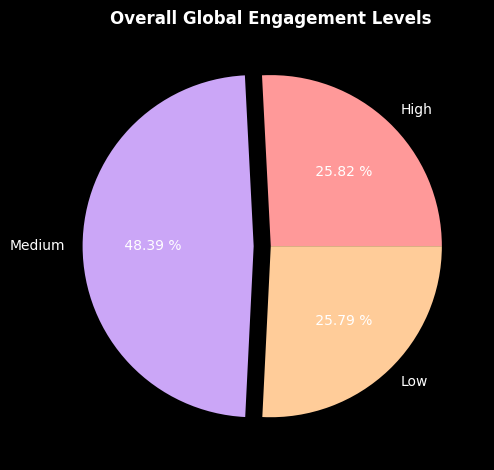

In [6]:
#calculating the percentage of gamers in different engagement levels
pct_engagement_high = (len(gaming.loc[gaming['EngagementLevel']=='High'])/len(gaming))*100
pct_engagement_medium = (len(gaming.loc[gaming['EngagementLevel']=='Medium'])/len(gaming))*100
pct_engagement_low = (len(gaming.loc[gaming['EngagementLevel']=='Low'])/len(gaming))*100

#creating arrays for passing to plot
engagement_sections = [pct_engagement_high, pct_engagement_medium, pct_engagement_low]
engagement_labels = ['High', 'Medium', 'Low']
colors = ['#ff9999', '#cba6f7', '#ffcc99']
engagement_explode = [0, 0.1, 0]

#plotting the graph
plt.title('Overall Global Engagement Levels', fontdict={'fontweight': 'bold'})

plt.pie(engagement_sections, labels=engagement_labels, colors=colors, autopct='% .2f %%', explode=engagement_explode)

plt.tight_layout()
plt.savefig('./generated/globalengagement.png', dpi=500)
plt.show()

In [7]:
#separating location based data into separate dataframes
gaming_asia = gaming.loc[gaming['Location']=='Asia']
gaming_usa = gaming.loc[gaming['Location']=='USA']
gaming_europe = gaming.loc[gaming['Location']=='Europe']
gaming_other = gaming.loc[gaming['Location']=='Other']

In [8]:
#calculating variables for regions by engagement level

#high engagement
pct_higheng_asia = (len(gaming_asia.loc[gaming_asia['EngagementLevel']=='High'])/len(gaming_asia))*100
pct_higheng_usa = (len(gaming_usa.loc[gaming_usa['EngagementLevel']=='High'])/len(gaming_usa))*100
pct_higheng_europe = (len(gaming_europe.loc[gaming_europe['EngagementLevel']=='High'])/len(gaming_europe))*100
pct_higheng_other = (len(gaming_other.loc[gaming_other['EngagementLevel']=='High'])/len(gaming_other))*100

#medium engagement
pct_mediumeng_asia = (len(gaming_asia.loc[gaming_asia['EngagementLevel']=='Medium'])/len(gaming_asia))*100
pct_mediumeng_usa = (len(gaming_usa.loc[gaming_usa['EngagementLevel']=='Medium'])/len(gaming_usa))*100
pct_mediumeng_europe = (len(gaming_europe.loc[gaming_europe['EngagementLevel']=='Medium'])/len(gaming_europe))*100
pct_mediumeng_other = (len(gaming_other.loc[gaming_other['EngagementLevel']=='Medium'])/len(gaming_other))*100

#low engagement
pct_loweng_asia = (len(gaming_asia.loc[gaming_asia['EngagementLevel']=='Low'])/len(gaming_asia))*100
pct_loweng_usa = (len(gaming_usa.loc[gaming_usa['EngagementLevel']=='Low'])/len(gaming_usa))*100
pct_loweng_europe = (len(gaming_europe.loc[gaming_europe['EngagementLevel']=='Low'])/len(gaming_europe))*100
pct_loweng_other = (len(gaming_other.loc[gaming_other['EngagementLevel']=='Low'])/len(gaming_other))*100

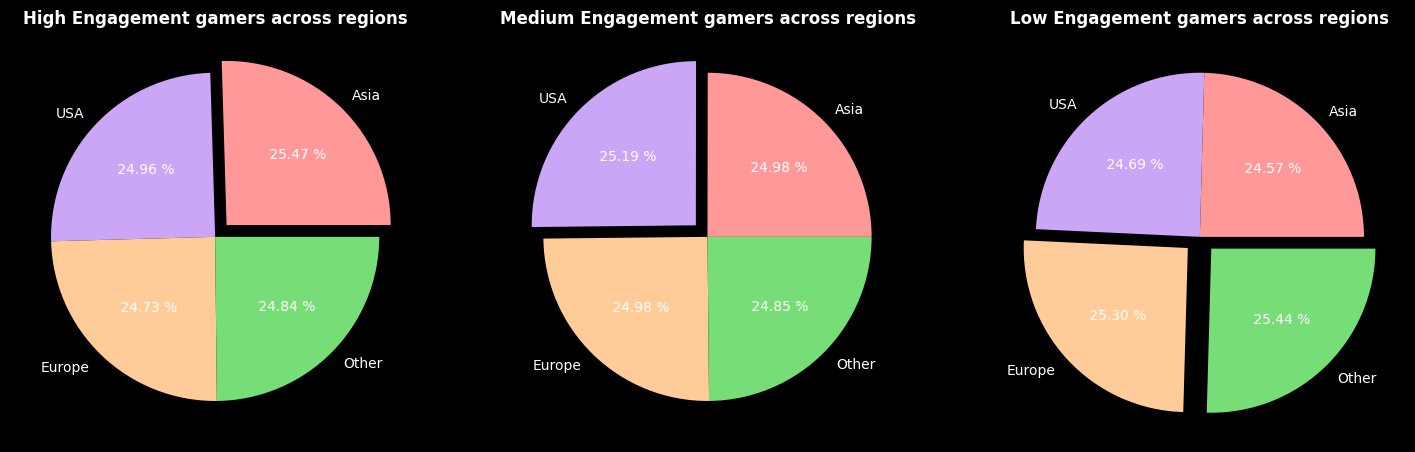

In [9]:
#plotting the data

#setting up the subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

#setting up other arrays and fonts
titlefont = {'fontweight':'bold'}
region_labels = ['Asia', 'USA', 'Europe', 'Other']
region_colors = ['#ff9999', '#cba6f7', '#ffcc99', '#77dd77']

#high engagement arrays:
higheng_sections = [pct_higheng_asia, pct_higheng_usa, pct_higheng_europe, pct_higheng_other]
higheng_explode = [0.1, 0, 0, 0]

#medium engagement arrays:
mediumeng_sections = [pct_mediumeng_asia, pct_mediumeng_usa, pct_mediumeng_europe, pct_mediumeng_other]
mediumeng_explode = [0, 0.1, 0, 0]

#low engagement arrays:
loweng_sections = [pct_loweng_asia, pct_loweng_usa, pct_loweng_europe, pct_loweng_other]
loweng_explode = [0, 0, 0.1, 0.1]

# Plotting the high engagement graph
axs[0].pie(higheng_sections, labels=region_labels, colors=region_colors, autopct='% .2f %%', explode=higheng_explode)
axs[0].set_title('High Engagement gamers across regions', fontdict=titlefont)

# Plotting the medium engagement graph
axs[1].pie(mediumeng_sections, labels=region_labels, colors=region_colors, autopct='% .2f %%', explode=mediumeng_explode)
axs[1].set_title('Medium Engagement gamers across regions', fontdict=titlefont)

# Plotting the low engagement graph
axs[2].pie(loweng_sections, labels=region_labels, colors=region_colors, autopct='% .2f %%', explode=loweng_explode)
axs[2].set_title('Low Engagement gamers across regions', fontdict=titlefont)

#plt.tight_layout()
plt.savefig('./generated/engagementbreakdown.png', dpi=500)
plt.show()

From the analysis  above, it is apparent that Asia and USA are the places to target for game developers focusing on longer, drawn out games, and it may be beneficial to include in-game-transactions as a means to boost income too, as higher engagement can generate, in general, a lot more revenue.

### Moving on, let's analyze the preferred difficulty levels of players globally:

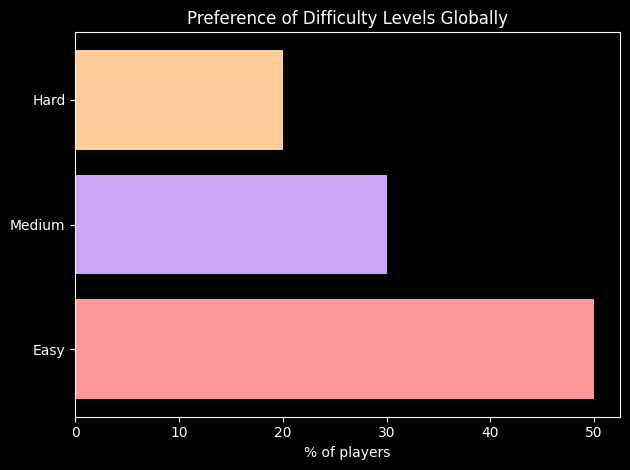

In [13]:
#calculating lobal difficulty preferences
pct_easy = (len(gaming.loc[gaming['GameDifficulty']=='Easy'])/len(gaming))*100
pct_medium = (len(gaming.loc[gaming['GameDifficulty']=='Medium'])/len(gaming))*100
pct_hard = (len(gaming.loc[gaming['GameDifficulty']=='Hard'])/len(gaming))*100

#creating other required arrays
difficulty_sections = [pct_easy, pct_medium, pct_hard]
difficulty_labels = ['Easy', 'Medium', 'Hard']
difficulty_colors = ['#ff9999', '#cba6f7', '#ffcc99']

#plotting the graph
plt.title('Preference of Difficulty Levels Globally')

plt.barh(difficulty_labels, difficulty_sections, color=difficulty_colors)
plt.xlabel('% of Players')

plt.tight_layout()
plt.savefig('./generated/globaldifficulty.png', dpi=500)
plt.show()

In [15]:
#calculating preference of hard difficulty by region
pct_hard_asia = (len(gaming_asia.loc[gaming_asia['GameDifficulty']=='Hard'])/len(gaming_asia))*100
pct_hard_usa = (len(gaming_usa.loc[gaming_usa['GameDifficulty']=='Hard'])/len(gaming_usa))*100
pct_hard_europe = (len(gaming_europe.loc[gaming_europe['GameDifficulty']=='Hard'])/len(gaming_europe))*100
pct_hard_other = (len(gaming_other.loc[gaming_other['GameDifficulty']=='Hard'])/len(gaming_other))*100

#calculating preference of medium difficulty by region
pct_medium_asia = (len(gaming_asia.loc[gaming_asia['GameDifficulty']=='Medium'])/len(gaming_asia))*100
pct_medium_usa = (len(gaming_usa.loc[gaming_usa['GameDifficulty']=='Medium'])/len(gaming_usa))*100
pct_medium_europe = (len(gaming_europe.loc[gaming_europe['GameDifficulty']=='Medium'])/len(gaming_europe))*100
pct_medium_other = (len(gaming_other.loc[gaming_other['GameDifficulty']=='Medium'])/len(gaming_other))*100

#calculating preference of low difficulty by region
pct_easy_asia = (len(gaming_asia.loc[gaming_asia['GameDifficulty']=='Easy'])/len(gaming_asia))*100
pct_easy_usa = (len(gaming_usa.loc[gaming_usa['GameDifficulty']=='Easy'])/len(gaming_usa))*100
pct_easy_europe = (len(gaming_europe.loc[gaming_europe['GameDifficulty']=='Easy'])/len(gaming_europe))*100
pct_easy_other = (len(gaming_other.loc[gaming_other['GameDifficulty']=='Easy'])/len(gaming_other))*100

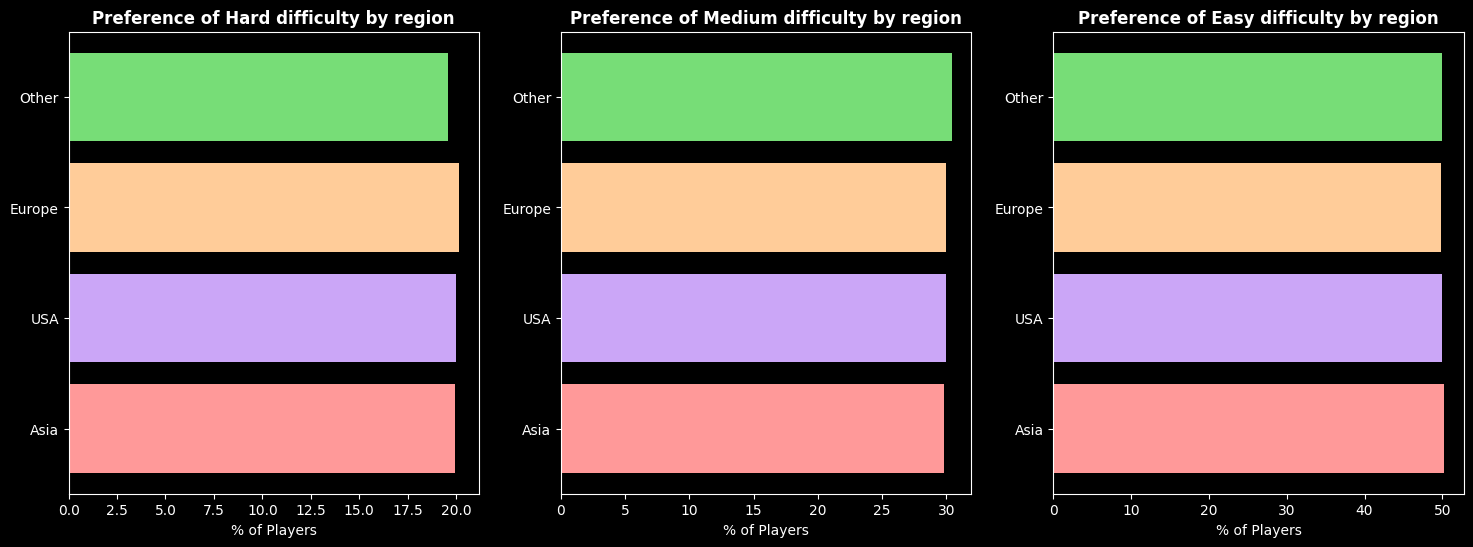

In [19]:
#plotting the data

#setting up the subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

#setting up required arrays by section
difficulty_sections_hard = [pct_hard_asia, pct_hard_usa, pct_hard_europe, pct_hard_other]
difficulty_sections_medium = [pct_medium_asia, pct_medium_usa, pct_medium_europe, pct_medium_other]
difficulty_sections_easy = [pct_easy_asia, pct_easy_usa, pct_easy_europe, pct_easy_other]

#setting up other arrays and fonts
#titlefont also set up previously
#region_labels set up previously
#region_colors also set up previously

# Plotting the high difficulty graph
axs[0].barh(region_labels, difficulty_sections_hard, color=region_colors)
axs[0].set_title('Preference of Hard difficulty by region', fontdict=titlefont)
axs[0].set_xlabel('% of Players')

# Plotting the medium difficulty graph
axs[1].barh(region_labels, difficulty_sections_medium, color=region_colors)
axs[1].set_title('Preference of Medium difficulty by region', fontdict=titlefont)
axs[1].set_xlabel('% of Players')

# Plotting the low difficulty graph
axs[2].barh(region_labels, difficulty_sections_easy, color=region_colors)
axs[2].set_title('Preference of Easy difficulty by region', fontdict=titlefont)
axs[2].set_xlabel('% of Players')

plt.savefig('./generated/difficultybreakdown.png', dpi=500)
plt.show()